In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import re
fb = pd.read_csv('nysu_10902_2019立委_research_補.csv')
politics = pd.read_csv('9th_legislator_promise.csv')

In [7]:

politics['姓名'].unique()

array(['吳思瑤', '姚文智', '何志偉', '蔣萬安', '李彥秀', '林昶佐', '蔣乃辛', '費鴻泰', '賴士葆',
       '呂 孫 綾', '林 淑 芬', '高志鵬', '余天', '吳 秉 叡', '蘇 巧 慧', '張 宏 陸', '羅 致 政',
       '江 永 昌', '林 德 福', '吳 琪 銘', '羅 明 才', '黃 國 昌', '蔡適應', '鄭 運 鵬',
       '陳賴素美', '陳學聖', '鄭寶清', '呂玉玲', '趙正宇', '林為洲', '柯建銘', '陳超明', '徐志榮',
       '蔡其昌', '顏寬恒', '洪慈庸', '張廖萬堅', '盧秀燕', '沈智慧', '黃國書', '何欣純', '江啟臣',
       '王惠美', '柯呈枋', '黃秀芳', '洪宗熠', '陳素月', '馬 文 君', '許 淑 華', '蘇 治 芬',
       '劉 建 國', '李 俊 俋', '蔡 易 餘', '陳 明 文', '葉宜津', '黃偉哲', '郭國文  ', '陳亭妃',
       '林俊憲', '王定宇', '邱 議 瑩', '邱 志 偉', '劉 世 芳', '林 岱 樺', '管 碧 玲', '李 昆 澤',
       '趙 天 麟', '馬 凱 妮', '賴 瑞 隆', '蘇震清', '鍾佳濱', '莊瑞雄', '陳歐珀', '蕭美琴',
       '劉櫂豪', '楊 曜', '楊鎮浯', '陳玉珍', '陳雪生', '廖國棟', '鄭天財', '陳瑩', '高金素梅',
       '簡東明', '孔文吉', nan], dtype=object)

In [8]:

fb['page_name'].unique()

array(['莊瑞雄', '楊曜Yangyao', '郭國文', '洪宗熠-熠起更好', '陳歐珀'], dtype=object)

In [9]:
po = fb[fb.page_name == "陳歐珀"]

po['new_date'] = pd.to_datetime(po['created_time_taipei']).dt.date
po['post_hour'] = pd.to_datetime(po['created_time_taipei']).dt.hour 
po['month_year'] = pd.to_datetime(po['new_date']).dt.to_period('M')
po.head(1)

<ipython-input-9-a2b168c94242>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  po['new_date'] = pd.to_datetime(po['created_time_taipei']).dt.date
<ipython-input-9-a2b168c94242>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  po['post_hour'] = pd.to_datetime(po['created_time_taipei']).dt.hour
<ipython-input-9-a2b168c94242>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,post_hour,month_year
1702,233849906653070_2100739946630714,233849906653070,陳歐珀,Politician,🧨【歐珀春聯放送中】🧨\n\n🧧歐珀尚水ㄟ春聯開放索取囉！🧧\n\n今年春聯邀請到國寶級書法...,NaN,photo,https://www.facebook.com/233849906653070/posts...,2019-01-14T04:33:42+0000,2019-01-14T12:33:42,...,0,0,0,0,0,2,5,2019-01-14,12,2019-01


In [10]:

post_time = po[['post_id','post_hour']].groupby('post_hour').count()
post_time.index.name = 'post_hour'
post_time.reset_index(inplace = True)
post_time

,post_hour,post_id
0,0,9
1,1,2
2,2,1
3,5,2
4,6,4
5,7,7
6,8,14
7,9,22
8,10,36
9,11,35


/usr/lib64/python3.6/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/lib64/python3.6/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib64/python3.6/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


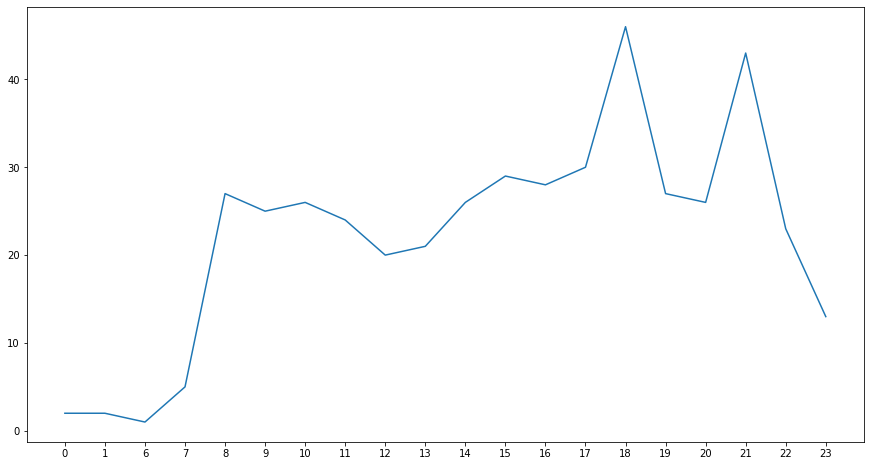

In [377]:
#畫出整年貼文分佈
labels = post_time['post_hour'].map(str)


fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
ax.plot(labels, post_time['post_id'])

plt.show()

In [11]:
#整年貼文數量分佈
whole_year = po[['post_id','month_year']].groupby('month_year').count()
whole_year.index.name = 'month_year'
whole_year.reset_index(inplace=True)
whole_year

,month_year,post_id
0,2019-01,34
1,2019-02,34
2,2019-03,32
3,2019-04,29
4,2019-05,33
5,2019-06,36
6,2019-07,28
7,2019-08,39
8,2019-09,27
9,2019-10,33


In [15]:
#每個月平均發文數量統計值
whole_year.describe()

,post_id
count,13.000000
mean,36.692308
std,11.455600
min,27.000000
25%,32.000000
50%,34.000000
75%,38.000000
max,72.000000


In [19]:
# 每個月的按讚、評論、分享總數 分佈
results = po.groupby('month_year').sum()
results.index.name = 'newhead'
results.reset_index(inplace=True)
results

,newhead,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,post_hour
0,2019-01,7950896826204380,6224,0,0,0,0,0,527,260,477
1,2019-02,7950896826204380,8761,0,0,0,0,0,287,274,437
2,2019-03,7483197012898240,7061,0,0,0,0,0,1021,146,487
3,2019-04,6781647292939030,7894,0,0,0,0,0,565,209,396
4,2019-05,7717046919551310,10137,0,0,0,0,0,1308,238,501
5,2019-06,8418596639510520,12307,0,0,0,0,0,431,364,562
6,2019-07,6547797386285960,10150,0,0,0,0,0,497,153,385
7,2019-08,9120146359469730,14033,0,0,0,0,0,470,236,599
8,2019-09,6313947479632890,10999,0,0,0,0,0,411,175,411
9,2019-10,7717046919551310,13996,0,0,0,0,0,526,242,487


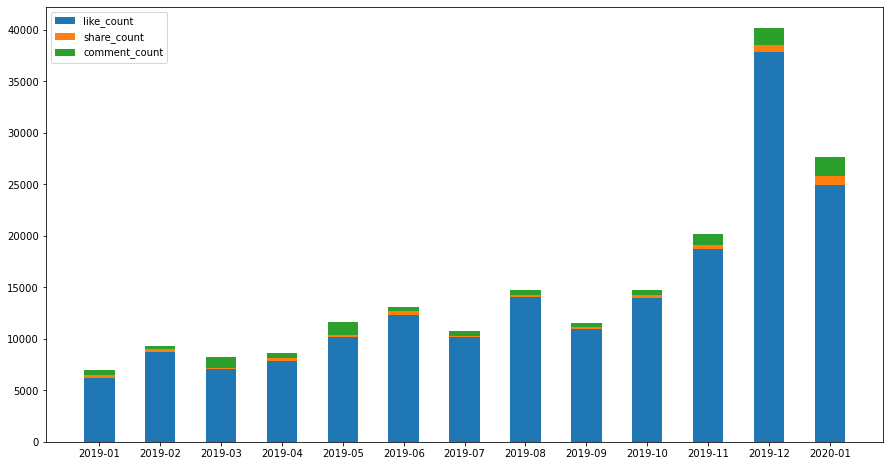

In [20]:
#整年按讚、評論、分享數

labels = results['newhead'].map(str)
width = 0.5       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

ax.bar(labels, results['like_count'], width, label='like_count')
ax.bar(labels, results['share_count'], width, label='share_count', bottom=results['like_count'])
ax.bar(labels, results['comment_count'], width, label='comment_count', bottom=results['share_count']+results['like_count'])
#ax.plot(labels, whole_year['post_id'])

ax.legend()
plt.show()

選前一個月聲量最高，一月聲量最低

In [22]:

highest = po[po.month_year == "2019-11"]
results_high = highest.groupby('new_date').sum()
results_high.index.name = 'newhead' #更改欄位名稱
results_high.reset_index(inplace=True)
results_high

,newhead,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,post_hour
0,2019-11-01,233849906653070,738,0,0,0,0,0,12,4,19
1,2019-11-02,467699813306140,1189,0,0,0,0,0,20,10,34
2,2019-11-03,233849906653070,362,0,0,0,0,0,19,21,15
3,2019-11-04,467699813306140,1172,0,0,0,0,0,50,9,43
4,2019-11-06,233849906653070,680,0,0,0,0,0,26,7,17
5,2019-11-08,233849906653070,264,0,0,0,0,0,10,6,15
6,2019-11-10,233849906653070,483,0,0,0,0,0,19,8,19
7,2019-11-12,467699813306140,579,0,0,0,0,0,20,11,22
8,2019-11-13,233849906653070,256,0,0,0,0,0,11,9,18
9,2019-11-14,467699813306140,1493,0,0,0,0,0,87,43,34


No handles with labels found to put in legend.


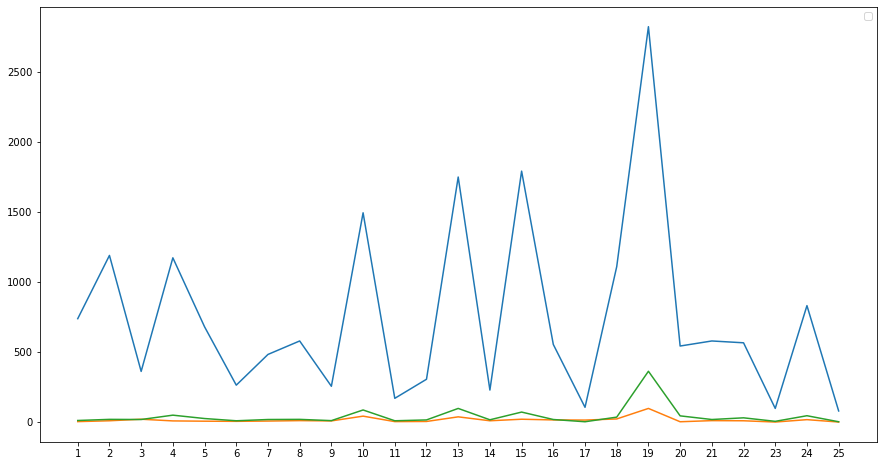

In [23]:
#畫圖 看整個月按讚、分享、評論的流量
labels = [str(i) for i in range(1,len(results_high)+1)]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

ax.plot(labels, results_high['like_count'])
ax.plot(labels, results_high['share_count'])
ax.plot(labels, results_high['comment_count'])

ax.legend()

plt.show()

11月23日聲量最高，11月30日聲量最低

In [28]:

po['new_date']=po['new_date'].map(str) # turn 'new_date' into str
Nov_23 = po[po['new_date'] == "2019-11-23"]
Nov_23[['message','like_count','share_count','comment_count']].replace(r'\n', ' ', regex = True)

<ipython-input-28-4813a4df1552>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  po['new_date']=po['new_date'].map(str) # turn 'new_date' into str


,message,like_count,share_count,comment_count
2040,今天是歐珀跟蔡英文暨陳歐珀聯合競選總部成立的日子，蔡英文總統、陳建仁副總統、游錫堃前院長、林...,1742,19,68
2041,📣「蔡英文 陳歐珀聯合競選總部」成立大會直播中📣 📍11/23(六 )地點：羅東鎮光榮路39...,1078,79,295


11月23日是蔡英文陳歐珀聯合競總成立

In [29]:
po['new_date']=po['new_date'].map(str) # turn 'new_date' into str
Nov_30 = po[po['new_date'] == "2019-11-30"]
Nov_30[['message','like_count','share_count','comment_count']].replace(r'\n', ' ', regex = True)

<ipython-input-29-5b09bce7226b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  po['new_date']=po['new_date'].map(str) # turn 'new_date' into str


,message,like_count,share_count,comment_count
2088,小英歐珀齊努力💪 打拚農業顧農民👨‍🌾 現在政府對於農業照護一直不遺餘力，農業升級也要朝向...,80,1,3


11月30日是農業升級

In [44]:
lowest = po[po.month_year == "2019-01"]
results_low = lowest.groupby('new_date').sum()
results_low.index.name = 'newhead' #更改欄位名稱
results_low.reset_index(inplace=True)
results_low

,newhead,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,post_hour
0,2019-01-01,233849906653070,141,0,0,0,0,0,8,2,11
1,2019-01-03,233849906653070,201,0,0,0,0,0,9,1,11
2,2019-01-04,701549719959210,404,0,0,0,0,0,41,20,35
3,2019-01-06,467699813306140,196,0,0,0,0,0,5,1,38
4,2019-01-07,233849906653070,114,0,0,0,0,0,10,4,8
5,2019-01-08,233849906653070,411,0,0,0,0,0,147,10,0
6,2019-01-09,233849906653070,101,0,0,0,0,0,5,0,14
7,2019-01-10,467699813306140,263,0,0,0,0,0,45,22,32
8,2019-01-12,233849906653070,221,0,0,0,0,0,9,11,12
9,2019-01-13,467699813306140,520,0,0,0,0,0,77,56,37


No handles with labels found to put in legend.


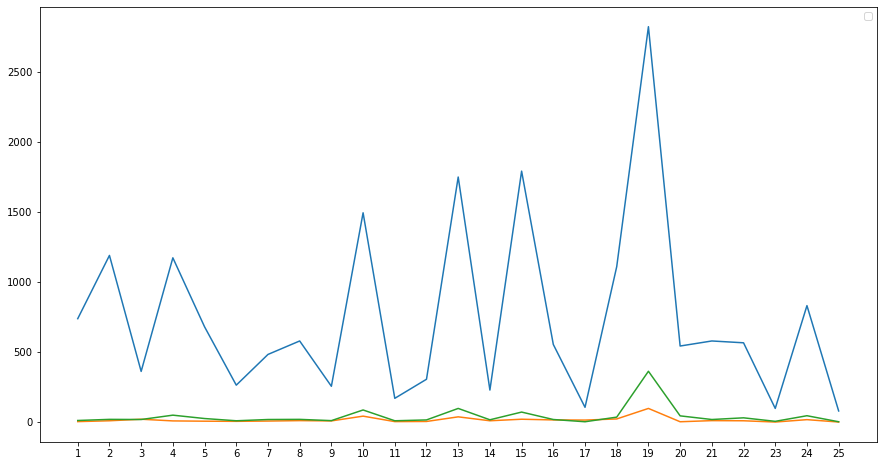

In [45]:
labels = [str(i) for i in range(1,len(results_high)+1)]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

ax.plot(labels, results_high['like_count'])
ax.plot(labels, results_high['share_count'])
ax.plot(labels, results_high['comment_count'])

ax.legend()

plt.show()

1月22日聲量最高，1月23日聲量最低

In [46]:
po['new_date']=po['new_date'].map(str) # turn 'new_date' into str
Jan_22 = po[po['new_date'] == "2019-01-22"]
Jan_22[['message','like_count','share_count','comment_count']].replace(r'\n', ' ', regex = True)

<ipython-input-46-9871b0b7bef3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  po['new_date']=po['new_date'].map(str) # turn 'new_date' into str


,message,like_count,share_count,comment_count
1728,歐珀堅決反對用暴力的方式表達個人意見，意見絕對可以自由表達，但不應用「巴掌」來表達。 鄭麗...,689,35,70
1729,早上歐珀到第四區工程處了解蘇澳地區及蘇花改相關路段春節疏導措施，希望能讓鄉親能夠用路更安全、...,73,0,3
1730,真的會很冷！ 請大家要注意保暖啊🥶🥶 日夜溫差大，建議採洋蔥式穿搭，務必、務必、務必做好保暖...,177,0,1


1月22日聲量最高為鄭麗君遭打巴掌事件。

In [47]:
po['new_date']=po['new_date'].map(str) # turn 'new_date' into str
Jan_23 = po[po['new_date'] == "2019-01-23"]
Jan_23[['message','like_count','share_count','comment_count']].replace(r'\n', ' ', regex = True)

<ipython-input-47-51371f8c9ad6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  po['new_date']=po['new_date'].map(str) # turn 'new_date' into str


,message,like_count,share_count,comment_count
1727,今天是1/23日世界自由日， 感念所有曾為這塊土地奉獻生命的民主鬥士。 - 歐珀與釋達觀師...,60,0,4


In [ ]:
1月23日聲量最低為世界自由日紀念。

In [30]:
#找出評論數量的統計值
po['comment_count'].describe()

count    477.000000
mean      22.475891
std       43.890452
min        0.000000
25%        6.000000
50%       11.000000
75%       24.000000
max      518.000000
Name: comment_count, dtype: float64

In [31]:
#從列出評論數（互動數）最高的一天
comment_top5 = po.sort_values('comment_count',ascending=False).head(5)
comment_top5 = comment_top5[['message','comment_count']]
comment_top5 = comment_top5.replace(r'\n',' ',regex=True) # message text preprocessing
comment_top5

,message,comment_count
2140,❗️2020英德勝利造勢晚會❗️直播中❗️ #小英總統會到現場唷 選戰倒數2天，進入最後...,518
1831,🎊陽醫二期擴建計畫啟動！30億經費中央全額補助！ 感謝蔡英文總統、林全前院長、賴清德前院...,378
1784,照片裡面這位可愛的桂英阿嬤今年102歲了。 2年前到頭城拔雅社區行動服務時，阿嬤特地來找歐...,340
2165,"葉毓蘭請不要污辱宜蘭人及台灣人！ 資料來源:三立新聞《葉毓蘭：弱智的支持陳歐珀 宜民眾怒""...",327
2041,📣「蔡英文 陳歐珀聯合競選總部」成立大會直播中📣 📍11/23(六 )地點：羅東鎮光榮路39...,295


In [35]:
# 比較、查看他政見
promise = politics[politics.姓名 == "陳歐珀"].政見.to_string()
re.split('。 |：', promise) # skip this, just to make it easier to read

['72    一、點亮台灣\u3000支持五大政治改革 1. 實踐世代正義 2. 改革政府效能 3. 啟動國會改革 ...']

In [36]:
# 整年 貼文分享數最高 
share_top5 = po.sort_values('share_count',ascending=False).head(5)
share_top5 = share_top5[['message','share_count']]
share_top5 = share_top5.replace(r'\n',' ',regex=True) # message text preprocessing
share_top5

,message,share_count
2165,"葉毓蘭請不要污辱宜蘭人及台灣人！ 資料來源:三立新聞《葉毓蘭：弱智的支持陳歐珀 宜民眾怒""...",446
2041,📣「蔡英文 陳歐珀聯合競選總部」成立大會直播中📣 📍11/23(六 )地點：羅東鎮光榮路39...,79
2140,❗️2020英德勝利造勢晚會❗️直播中❗️ #小英總統會到現場唷 選戰倒數2天，進入最後...,62
1867,宜蘭確定已遭秋行軍蟲入侵，防檢局今天下午將派員前往銷毀玉米田。 秋行軍蟲擁有「一個晚上最多...,57
1703,🔉【直播ING】歐珀FUN送台part.6 晚安👋 大家猜到是什麼神秘活動了嗎？ 帶大家來...,53


In [37]:
# 貼文總按讚數最高 
like_top5 = po.sort_values('like_count',ascending=False).head(5)
like_top5 = like_top5[['post_id','message','like_count']]
like_top5 = like_top5.replace(r'\n',' ',regex=True) # message text preprocessing
like_top5

,post_id,message,like_count
2147,233849906653070_2743559272348775,感謝 蔡英文 Tsai Ing-wen 總統的推薦✨ 歐珀擔任立委這八年來，始終競競業業的...,2054
1831,233849906653070_2280417198662987,🎊陽醫二期擴建計畫啟動！30億經費中央全額補助！ 感謝蔡英文總統、林全前院長、賴清德前院...,1920
2040,233849906653070_2639654026072634,今天是歐珀跟蔡英文暨陳歐珀聯合競選總部成立的日子，蔡英文總統、陳建仁副總統、游錫堃前院長、林...,1742
1821,233849906653070_2249812041723503,感謝宜蘭鄉親的肯定，讓歐珀能夠代表民進黨參選2020年立委選舉，明年大選攸關台灣主權之爭，請...,1471
2059,233849906653070_2618881344816569,✨惜堃顧宜蘭 立委拼過半✨ 💪宜蘭人先挺宜蘭人💪 游錫堃院長，不僅是民主進步黨928創黨...,1402


In [38]:
#按讚次數最少的貼文 
lastlike_5 = po.sort_values(by = ['like_count'],ascending = True).head(5)
lastlike_5[['message','like_count','month_year']].replace(r'\n',' ',regex=True)

,message,like_count,month_year
2104,💪【#抗中保台】這樣做： ✅ 總統票投③號蔡英文、賴清德 ✅ 立委票投②號 陳歐珀 ✅ 政...,9,2019-12
2148,勇敢自信、護台同行， 小英、歐珀懇請邀請鄉親共同來參加。 ✨2020英德勝利造勢晚會...,14,2020-01
1755,仰山文教基金會一年一度的建築文化巡禮開始報名囉！ 活動費用全免，有興趣的朋友抓緊時間，手刀報...,42,2019-02
1910,✨感受當下，分享感動！✨ 感謝 小鎮創生｜Townmaking 每個禮拜，用影像記錄著，...,44,2019-07
1723,📢【直播預告】📢 歐珀FUN送台part.7 1/26星期六 下午3:00 歐爸的私房小旅...,45,2019-01


結論
11月聲量最高，一月聲量最低
11月23日聲量最高，為陳歐珀蔡英文聯合競總成立。
11月30日聲量最低，為農業升級。
1月22日聲量最高，為鄭麗君遭打巴掌。
1月23日聲量最低，為紀念世界自由日。